In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()

## Load Sequence Data 
To Determine Primers

In [2]:
sequences_df = pd.read_csv('sequences_all.tsv', delimiter='\t')
sequence_order_primer_type_df  = sequences_df.melt(id_vars= sequences_df.columns[0]) 
def funct_or_emo(string):
    if '-emo'in string:
        return 'emotional'
    if '-funct' in string:
        return 'functional'
    if '__' in string:
        return 'crosshair'
    return 'image'

def get_primed_image(string):
    if 'primer'in string:
        return re.search(r"-(?:emo|funct)-(.+)", string).group(1)
    return '_'.join(string.split('_')[1:])
sequence_order_primer_type_df['primer-type'] =  sequence_order_primer_type_df.value.apply(funct_or_emo)
sequence_order_primer_type_df['primed-image'] =  sequence_order_primer_type_df.value.apply(get_primed_image)
sequence_order_primer_type_df

,Sequence name/ Order,variable,value,primer-type,primed-image
0,A,0,0_primer-funct-4_floor-cleaner-4,functional,4_floor-cleaner-4
1,B,0,0_primer-emo-4_floor-cleaner-4,emotional,4_floor-cleaner-4
2,C,0,123_primer-emo-2_car-inside-3,emotional,2_car-inside-3
3,D,0,123_primer-funct-2_car-inside-3,functional,2_car-inside-3
4,E,0,0_primer-funct-4_floor-cleaner-4,functional,4_floor-cleaner-4
...,...,...,...,...,...
1723,H,143,125_2_car-inside-3,image,2_car-inside-3
1724,I,143,20_1_kitchen,image,1_kitchen
1725,J,143,20_1_kitchen,image,1_kitchen
1726,K,143,23_4_floor-cleaner-1,image,4_floor-cleaner-1


In [3]:
sequences_df.columns[0]

'Sequence name/ Order'

In [4]:
survey_df = pd.read_csv('Experiment check list - survey responses.tsv', delimiter='\t')
survey_df.head()

,Timestamp,Please write your Subject ID number,What is your gender?,What is your age?,Are you wearing glasses or contact lenses?,What is your first language?,Are you currently enrolled in a Cognitive Science course?,image 1 - face,image 2 - face,image 3 - face,image 4 - face,image 5 - face,image 6 - face,image 7 - face,image 8 - face,image 9 - face,image 10 - face
0,11/13/2019 20:33:49,P001,Female,26,NaN,NaN,NaN,5,4,4,5,3,2,3,4,4,3
1,11/15/2019 9:18:27,P002,Female,24,I am wearing neither.,Danish,Yes,5,4,4,2,1,5,3,1,1,4
2,11/15/2019 10:00:40,P003,Female,24,I am wearing neither.,Danish,No,5,5,5,5,5,5,3,5,5,3
3,11/15/2019 12:14:16,P004,Female,26,I am wearing neither.,Danish,No,5,5,5,5,4,5,5,5,4,5
4,11/15/2019 12:18:23,P005,Female,24,I am wearing neither.,Lithuanian,Yes,4,4,3,2,3,1,3,2,2,1


## Survey Data
#### Get stats for image ratings 

In [5]:
survey_df.groupby('What is your gender?')

In [6]:
image_cols = [col for col in survey_df.columns if 'image' in col]
image_ratings_df = pd.DataFrame(survey_df[image_cols].mean()).rename(columns={0:'mean'})
image_ratings_df['median'] = survey_df[image_cols].median()
image_ratings_df['stdev'] = survey_df[image_cols].std()
image_ratings_df

,mean,median,stdev
image 1 - face,4.833333,5.0,0.379049
image 2 - face,4.733333,5.0,0.520830
image 3 - face,4.200000,4.5,0.961321
image 4 - face,4.166667,4.5,1.053183
image 5 - face,3.500000,3.5,1.224745
image 6 - face,3.366667,3.0,1.425950
image 7 - face,3.166667,3.0,1.147211
image 8 - face,3.033333,3.0,1.245221
image 9 - face,3.066667,3.0,1.201532
image 10 - face,2.833333,3.0,1.341212


In [7]:
subjects_df = pd.read_csv('Experiment check list - subjects.tsv', delimiter='\t')
subjects_df = subjects_df.join(survey_df)
subjects_df

,ID number,name,consent form,lights,TOBII ID,RecordingID,Duration (seconds),Weighted Gaze Samples (%),Gaze Samples (%),callibration,...,image 1 - face,image 2 - face,image 3 - face,image 4 - face,image 5 - face,image 6 - face,image 7 - face,image 8 - face,image 9 - face,image 10 - face
0,P001,Kornelija,n,"close window, full indoor",P001,Rec 01,457.8,63,64,y,...,5,4,4,5,3,2,3,4,4,3
1,P002,Clara,y,"close window, full indoor",P002,E_P002_rec01,492.4,60,62,y,...,5,4,4,2,1,5,3,1,1,4
2,P003,Tereza,y,"close window, full indoor",P003,F_p003_rec1,411.6,43,43,y,...,5,5,5,5,5,5,3,5,5,3
3,P004,NaN,y,"close window, full indoor",P004,A_p004_rec1,407.4,47,50,y,...,5,5,5,5,4,5,5,5,4,5
4,P005,NaN,y,"close window, full indoor",P005,B_p005_rec1,367.1,7,7,y,...,4,4,3,2,3,1,3,2,2,1
5,P006,NaN,y,"close window, full indoor",P006,C_p006_01,347.8,14,14,y,...,5,4,5,4,4,2,2,3,3,1
6,P007,NaN,y,"close window, full indoor",P007,D_p007_rec1,360.1,93,93,y,...,5,5,5,4,5,4,3,3,3,3
7,P008,NaN,y,"close window, full indoor",P008,E_p008_rec1,410.4,18,19,y,...,5,5,4,4,5,5,3,2,4,2
8,P009,NaN,y,"close window, full indoor",P009,F_009_rec1,391.7,49,49,y,...,5,5,2,5,3,4,4,2,2,2
9,P010,NaN,y,"close window, full indoor",P010,A_P010_rec1,479.6,53,53,y,...,5,5,5,3,3,3,4,3,4,2


In [8]:
def get_image_name(x):
    match = re.match(r"(.+\.(?:png|jpg))", x)
    if match is not None:
        #print(match.group(0))
        return '_'.join(match.group(0).split('.')[0].split('_')[2:])
    return None

def get_aoi_name(x):
    return x.split("_")[-2]


In [9]:
def analyze_measure(measure_name, measurement):
    tobii_measure_df = pd.read_csv(
        'summary-stats/{}.txt'.format(measure_name), delimiter='\t')
    #return tobii_measure_df
    tobii_measure_df = tobii_measure_df.melt(
        id_vars=tobii_measure_df.columns[0])
    tobii_measure_df = tobii_measure_df.rename(
        columns={"Unnamed: 0": "ID number"})
    tobii_measure_df['metric'] = measure_name
    tobii_measure_df['image_AOI_measure'] = tobii_measure_df[[
        'metric', 'variable']].apply(lambda x: re.sub(x[0]+'_', '', x[1]), axis=1)
    tobii_measure_df['image'] = tobii_measure_df['image_AOI_measure'].apply(
        get_image_name)
    tobii_measure_df['AOI'] = tobii_measure_df['image_AOI_measure'].apply(
        lambda x: x.split("_")[-2])
    tobii_measure_df['measurement'] = tobii_measure_df['image_AOI_measure'].apply(
        lambda x: x.split("_")[-1])
    # return tobii_measure_df
    analysis_columns = ['ID number', 'image', 'AOI',
                        'metric', 'measurement', 'value', 'Sequence']
    tobii_measure_seq_df = tobii_measure_df.join(subjects_df.set_index(
        "ID number"), on="ID number", rsuffix='_subject')[analysis_columns]
    tobii_measure_seq_df.to_csv('test_results.csv')
    # return tobii_measure_seq_df
    # return sequence_order_primer_type_df, tobii_measure_df
    aoi_data_with_primers_df = pd.merge(sequence_order_primer_type_df, tobii_measure_seq_df, left_on=[
        'Sequence name/ Order', 'primed-image'], right_on=['Sequence', 'image']).rename(columns={'value_y': 'value',
                                                                                                 'value_x': 'primer-image-name'})
    # return tobii_measure_seq_df, aoi_data_with_primers_df

    def clean_val(x):
        if isinstance(x, int):
            return x
        if x == '-':
            return None
        if ',' in x:
            return float(re.sub(',', '.', x))
        return float(x)

    aoi_data_with_primers_df.value = aoi_data_with_primers_df.value.apply(
        clean_val)
    # return aoi_data_with_primers_df
    emo_primers = aoi_data_with_primers_df[aoi_data_with_primers_df['primer-type'] == 'emotional']
    funct_primers = aoi_data_with_primers_df[aoi_data_with_primers_df['primer-type'] == 'functional']

    gb_cols = ['primed-image', 'AOI']
    func_primers_gb_agg = funct_primers[funct_primers['measurement'] == measurement].groupby(
        gb_cols).agg({'image': 'size', 'value': 'mean'}).rename(columns={'value': 'functional-val', 
                                                                         'image': 'num-datapoints-funct'})
    
    func_primers_gb_agg['primer'] = 'functional'
    func_primers_gb_agg

    emo_primers_gb_agg = emo_primers[emo_primers['measurement'] == measurement].groupby(
        gb_cols).agg({'image': 'size', 'value': 'mean'}).rename(columns={'value': 'emotional-val', 
                                                                         'image': 'num-datapoints-emo'})
    emo_primers_gb_agg['primer'] = 'emotional'
    aggregate_scores_both_primers = pd.concat([emo_primers_gb_agg,
        func_primers_gb_agg],axis=1, sort=False)
    aggregate_scores_both_primers['measurement'] = measurement
    aggregate_scores_both_primers['aggregate'] = measurement.lower()
    aggregate_scores_both_primers['metric'] = measure_name

    emo_primers[emo_primers['measurement'] ==
                'Mean'].groupby('primed-image').count()

    emo_primers[emo_primers['measurement'] ==
                'Mean'].groupby('primed-image').mean()
    return aoi_data_with_primers_df, aggregate_scores_both_primers



aoi_data_with_primers_df, agg_measure_both_primers = analyze_measure(
    'Total Visit Duration (Include Zeros)', 'Mean')
aoi_data_with_primers_df

,Sequence name/ Order,variable,primer-image-name,primer-type,primed-image,ID number,image,AOI,metric,measurement,value,Sequence
0,E,6,75_primer-funct-3_house,functional,3_house,P002,3_house,face,Total Visit Duration (Include Zeros),N,1.00,E
1,E,6,75_primer-funct-3_house,functional,3_house,P008,3_house,face,Total Visit Duration (Include Zeros),N,1.00,E
2,E,6,75_primer-funct-3_house,functional,3_house,P014,3_house,face,Total Visit Duration (Include Zeros),N,1.00,E
3,E,6,75_primer-funct-3_house,functional,3_house,P020,3_house,face,Total Visit Duration (Include Zeros),N,1.00,E
4,E,6,75_primer-funct-3_house,functional,3_house,P026,3_house,face,Total Visit Duration (Include Zeros),N,1.00,E
...,...,...,...,...,...,...,...,...,...,...,...,...
13015,D,143,56_7_coffee,image,7_coffee,P025,7_coffee,Not on AOI,Total Visit Duration (Include Zeros),Median,0.41,D
13016,D,143,56_7_coffee,image,7_coffee,P007,7_coffee,Not on AOI,Total Visit Duration (Include Zeros),Stdev,NaN,D
13017,D,143,56_7_coffee,image,7_coffee,P013,7_coffee,Not on AOI,Total Visit Duration (Include Zeros),Stdev,NaN,D
13018,D,143,56_7_coffee,image,7_coffee,P019,7_coffee,Not on AOI,Total Visit Duration (Include Zeros),Stdev,NaN,D


In [10]:
image_ratings_df = image_ratings_df.reset_index()

In [11]:
image_names = list(set(aoi_data_with_primers_df.image.tolist()))
image_names

['3_house',
 '5_car-front-seat',
 '1_kitchen',
 '10_boat',
 '4_floor-cleaner',
 '2_car-inside',
 '9_furniture',
 '7_coffee',
 '8_instrument',
 '6_bag']

In [12]:
for i in range(10):
    image_name = [s for s in image_names if str(i+1)+"_" in s][0]
    image_ratings_df.loc[image_ratings_df['index'] ==
                         "image {} - face".format(i+1), "image-name"] = image_name
image_ratings_df = image_ratings_df.rename(
    columns={"mean": "image-face-rating-mean", "median": "image-face-rating-median",
             "stdev": "image-face-rating-stdev"}).set_index("image-name")
image_ratings_df = image_ratings_df[[x for x in image_ratings_df.columns if x != 'index']]
image_ratings_df

,image-face-rating-mean,image-face-rating-median,image-face-rating-stdev
image-name,,,
1_kitchen,4.833333,5.0,0.379049
2_car-inside,4.733333,5.0,0.520830
3_house,4.200000,4.5,0.961321
4_floor-cleaner,4.166667,4.5,1.053183
5_car-front-seat,3.500000,3.5,1.224745
6_bag,3.366667,3.0,1.425950
7_coffee,3.166667,3.0,1.147211
8_instrument,3.033333,3.0,1.245221
9_furniture,3.066667,3.0,1.201532


In [13]:
agg_measure_both_primers

num-datapoints-emo  emotional-val     primer  \
primed-image     AOI                                                         
10_boat          Not on AOI                   16       0.608125  emotional   
                 Rectangle 2                  16       1.611250  emotional   
                 face                         16       1.098750  emotional   
1_kitchen        Not on AOI                   14       0.778571  emotional   
                 Rectangle 2                  14       1.227143  emotional   
                 face                         14       2.960000  emotional   
2_car-inside     Not on AOI                   16       0.236875  emotional   
                 Rectangle 2                  16       1.158125  emotional   
                 face                         16       1.843125  emotional   
3_house          Not on AOI                   14       0.445714  emotional   
                 Rectangle 2                  14       0.648571  emotional   
                 face                         14       2.567143  emotional   
4_floor-cleaner  Not on AOI                   14       0.872143  emotional   
                 Rectangle 2                  14       0.250000  emotional   
                 face                         14       2.285714  emotional   
5_car-front-seat Not on AOI                   14       0.470000  emotional   
                 Rectangle 2                  14       0.612857  emotional   
                 face                         14       2.019286  emotional   
6_bag            Not on AOI                   16       0.290625  emotional   
                 Rectangle 2                  16       0.405000  emotional   
                 face                         16       2.369375  emotional   
7_coffee         Not on AOI                   14       0.285000  emotional   
                 Rectangle 2                  14       0.036429  emotional   
                 face                         14       3.302143  emotional   
8_instrument     Not on AOI                   14       1.266429  emotional   
                 Rectangle 3                  14       0.768571  emotional   
                 face                         14       1.288571  emotional   
9_furniture      Not on AOI                   14       0.569286  emotional   
                 Rectangle 2                  14       0.555000  emotional   
                 Rectangle 3                  14       0.431429  emotional   
                 face                         14       1.807143  emotional   

                              num-datapoints-funct  functional-val  \
primed-image     AOI                                                 
10_boat          Not on AOI                     14        0.682143   
                 Rectangle 2                    14        2.099286   
                 face                           14        0.972857   
1_kitchen        Not on AOI                     16        0.575625   
                 Rectangle 2                    16        1.045000   
                 face                           16        3.265625   
2_car-inside     Not on AOI                     14        0.460714   
                 Rectangle 2                    14        0.976429   
                 face                           14        1.944286   
3_house          Not on AOI                     16        0.223125   
                 Rectangle 2                    16        0.698750   
                 face                           16        2.749375   
4_floor-cleaner  Not on AOI                     16        0.779375   
                 Rectangle 2                    16        0.556875   
                 face                           16        2.138125   
5_car-front-seat Not on AOI                     16        0.384375   
                 Rectangle 2                    16        0.718125   
                 face                           16        2.475000   
6_bag            Not on AOI                     14     

In [14]:
firsts = agg_measure_both_primers.index.get_level_values('primed-image')
firsts

Index(['10_boat', '10_boat', '10_boat', '1_kitchen', '1_kitchen', '1_kitchen',
       '2_car-inside', '2_car-inside', '2_car-inside', '3_house', '3_house',
       '3_house', '4_floor-cleaner', '4_floor-cleaner', '4_floor-cleaner',
       '5_car-front-seat', '5_car-front-seat', '5_car-front-seat', '6_bag',
       '6_bag', '6_bag', '7_coffee', '7_coffee', '7_coffee', '8_instrument',
       '8_instrument', '8_instrument', '9_furniture', '9_furniture',
       '9_furniture', '9_furniture'],
      dtype='object', name='primed-image')

In [15]:
# Add face ratings to each image in aggregate scores
agg_measure_both_primers['image-face-rating-mean'] = image_ratings_df.loc[firsts].values[:, 0]
agg_measure_both_primers['image-face-rating-median'] = image_ratings_df.loc[firsts].values[:, 1]
agg_measure_both_primers['image-face-rating-stdev'] = image_ratings_df.loc[firsts].values[:, 2]
agg_measure_both_primers.head(10)

num-datapoints-emo  emotional-val     primer  \
primed-image AOI                                                         
10_boat      Not on AOI                   16       0.608125  emotional   
             Rectangle 2                  16       1.611250  emotional   
             face                         16       1.098750  emotional   
1_kitchen    Not on AOI                   14       0.778571  emotional   
             Rectangle 2                  14       1.227143  emotional   
             face                         14       2.960000  emotional   
2_car-inside Not on AOI                   16       0.236875  emotional   
             Rectangle 2                  16       1.158125  emotional   
             face                         16       1.843125  emotional   
3_house      Not on AOI                   14       0.445714  emotional   

                          num-datapoints-funct  functional-val      primer  \
primed-image AOI                                                             
10_boat      Not on AOI                     14        0.682143  functional   
             Rectangle 2                    14        2.099286  functional   
             face                           14        0.972857  functional   
1_kitchen    Not on AOI                     16        0.575625  functional   
             Rectangle 2                    16        1.045000  functional   
             face                           16        3.265625  functional   
2_car-inside Not on AOI                     14        0.460714  functional   
             Rectangle 2                    14        0.976429  functional   
             face                           14        1.944286  functional   
3_house      Not on AOI                     16        0.223125  functional   

                         measurement aggregate  \
primed-image AOI                                 
10_boat      Not on AOI         Mean      mean   
             Rectangle 2        Mean      mean   
             face               Mean      mean   
1_kitchen    Not on AOI         Mean      mean   
             Rectangle 2        Mean      mean   
             face               Mean      mean   
2_car-inside Not on AOI         Mean      mean   
             Rectangle 2        Mean      mean   
             face               Mean      mean   
3_house      Not on AOI         Mean      mean   

                                                        metric  \
primed-image AOI                                                 
10_boat      Not on AOI   Total Visit Duration (Include Zeros)   
             Rectangle 2  Total Visit Duration (Include Zeros)   
             face         Total Visit Duration (Include Zeros)   
1_kitchen    Not on AOI   Total Visit Duration (Include Zeros)   
             Rectangle 2  Total Visit Duration (Include Zeros)   
             face         Total Visit Duration (Include Zeros)   
2_car-inside Not on AOI   Total Visit Duration (Include Zeros)   
             Rectangle 2  Total Visit Duration (Include Zeros)   
             face         Total Visit Duration (Include Zeros)   
3_house      Not on AOI   Total Visit Duration (Include Zeros)   

                          image-face-rating-mean  image-face-rating-median  \
primed-image AOI                                                             
10_boat      Not on AOI                 2.833333                       3.0   
             Rectangle 2                2.833333                       3.0   
             face                       2.833333                       3.0   
1_kitchen    Not on AOI                 4.833333                       5.0   
             Rectangle 2                4.833333                       5.0   
             face                       4.833333                       5.0   
2_car-inside Not on AOI                 4.733333                       5.0   
             Rectangle 2                4.733333                       5.0   
             face         

In [16]:
agg_measure_both_primers['proves-hypothesis'] = 'none'

In [17]:
# compare means of time to first fixation for each aoi- given a primer

for img in firsts:
    #print(np.where(agg_measure_both_primers.loc[img,'face']['emotional-val'] < agg_measure_both_primers.loc[img,'face']['functional-val'], True, False))
    proves_hypothesis = np.where(agg_measure_both_primers.loc[img,'face']['emotional-val'] < agg_measure_both_primers.loc[img,'face']['functional-val'], 'true', 'false')
    agg_measure_both_primers.loc[(img,'face'),'proves-hypothesis'] = proves_hypothesis
    if (img, 'Rectangle 2') in agg_measure_both_primers.index:
        proves_hypothesis = np.where(agg_measure_both_primers.loc[img,'Rectangle 2']['functional-val'] < agg_measure_both_primers.loc[img,'Rectangle 2']['emotional-val'], 'true', 'false')
        agg_measure_both_primers.loc[(img,'Rectangle 2'),'proves-hypothesis'] = proves_hypothesis
    if (img, 'Rectangle 3') in agg_measure_both_primers.index:
        proves_hypothesis = np.where(agg_measure_both_primers.loc[img,'Rectangle 3']['functional-val'] < agg_measure_both_primers.loc[img,'Rectangle 3']['emotional-val'], 'true', 'false' )
        agg_measure_both_primers.loc[(img,'Rectangle 3'),'proves-hypothesis'] = proves_hypothesis

agg_measure_both_primers

num-datapoints-emo  emotional-val     primer  \
primed-image     AOI                                                         
10_boat          Not on AOI                   16       0.608125  emotional   
                 Rectangle 2                  16       1.611250  emotional   
                 face                         16       1.098750  emotional   
1_kitchen        Not on AOI                   14       0.778571  emotional   
                 Rectangle 2                  14       1.227143  emotional   
                 face                         14       2.960000  emotional   
2_car-inside     Not on AOI                   16       0.236875  emotional   
                 Rectangle 2                  16       1.158125  emotional   
                 face                         16       1.843125  emotional   
3_house          Not on AOI                   14       0.445714  emotional   
                 Rectangle 2                  14       0.648571  emotional   
                 face                         14       2.567143  emotional   
4_floor-cleaner  Not on AOI                   14       0.872143  emotional   
                 Rectangle 2                  14       0.250000  emotional   
                 face                         14       2.285714  emotional   
5_car-front-seat Not on AOI                   14       0.470000  emotional   
                 Rectangle 2                  14       0.612857  emotional   
                 face                         14       2.019286  emotional   
6_bag            Not on AOI                   16       0.290625  emotional   
                 Rectangle 2                  16       0.405000  emotional   
                 face                         16       2.369375  emotional   
7_coffee         Not on AOI                   14       0.285000  emotional   
                 Rectangle 2                  14       0.036429  emotional   
                 face                         14       3.302143  emotional   
8_instrument     Not on AOI                   14       1.266429  emotional   
                 Rectangle 3                  14       0.768571  emotional   
                 face                         14       1.288571  emotional   
9_furniture      Not on AOI                   14       0.569286  emotional   
                 Rectangle 2                  14       0.555000  emotional   
                 Rectangle 3                  14       0.431429  emotional   
                 face                         14       1.807143  emotional   

                              num-datapoints-funct  functional-val  \
primed-image     AOI                                                 
10_boat          Not on AOI                     14        0.682143   
                 Rectangle 2                    14        2.099286   
                 face                           14        0.972857   
1_kitchen        Not on AOI                     16        0.575625   
                 Rectangle 2                    16        1.045000   
                 face                           16        3.265625   
2_car-inside     Not on AOI                     14        0.460714   
                 Rectangle 2                    14        0.976429   
                 face                           14        1.944286   
3_house          Not on AOI                     16        0.223125   
                 Rectangle 2                    16        0.698750   
                 face                           16        2.749375   
4_floor-cleaner  Not on AOI                     16        0.779375   
                 Rectangle 2                    16        0.556875   
                 face                           16        2.138125   
5_car-front-seat Not on AOI                     16        0.384375   
                 Rectangle 2                    16        0.718125   
                 face                           16        2.475000   
6_bag            Not on AOI                     14     

In [18]:
print( "# of mean scores that prove the hypothesis:", len(agg_measure_both_primers[agg_measure_both_primers['proves-hypothesis'] == 'true']))
print( "# of mean scores that go against the hypothesis:", len(agg_measure_both_primers[agg_measure_both_primers['proves-hypothesis'] == 'false']))

# of mean scores that prove the hypothesis: 9
# of mean scores that go against the hypothesis: 12


## Subject by subject measures:
Calculate for each subject, which AOI was looked at first. Then aggregate based on primer type.

In [19]:
all_subjects_aois_df = pd.merge(aoi_data_with_primers_df, image_ratings_df,
                                left_on='primed-image', right_on='image-name')  # .groupby('ID number')
all_subjects_aois_df = all_subjects_aois_df[all_subjects_aois_df.measurement == 'Mean'].sort_values(['image', 'primer-type','ID number'])
all_subjects_aois_df


,Sequence name/ Order,variable,primer-image-name,primer-type,primed-image,ID number,image,AOI,metric,measurement,value,Sequence,image-face-rating-mean,image-face-rating-median,image-face-rating-stdev
10506,A,81,81_primer-emo-10_boat,emotional,10_boat,P001,10_boat,face,Total Visit Duration (Include Zeros),Mean,0.00,A,2.833333,3.0,1.341212
10548,A,81,81_primer-emo-10_boat,emotional,10_boat,P001,10_boat,Rectangle 2,Total Visit Duration (Include Zeros),Mean,0.82,A,2.833333,3.0,1.341212
10590,A,81,81_primer-emo-10_boat,emotional,10_boat,P001,10_boat,Not on AOI,Total Visit Duration (Include Zeros),Mean,2.79,A,2.833333,3.0,1.341212
11345,E,96,81_primer-emo-10_boat,emotional,10_boat,P002,10_boat,face,Total Visit Duration (Include Zeros),Mean,2.36,E,2.833333,3.0,1.341212
11380,E,96,81_primer-emo-10_boat,emotional,10_boat,P002,10_boat,Rectangle 2,Total Visit Duration (Include Zeros),Mean,0.00,E,2.833333,3.0,1.341212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,B,143,143_9_furniture,image,9_furniture,P029,9_furniture,Not on AOI,Total Visit Duration (Include Zeros),Mean,0.00,B,3.066667,3.0,1.201532
2669,C,17,143_9_furniture,image,9_furniture,P030,9_furniture,face,Total Visit Duration (Include Zeros),Mean,2.14,C,3.066667,3.0,1.201532
2704,C,17,143_9_furniture,image,9_furniture,P030,9_furniture,Rectangle 2,Total Visit Duration (Include Zeros),Mean,0.65,C,3.066667,3.0,1.201532
2739,C,17,143_9_furniture,image,9_furniture,P030,9_furniture,Rectangle 3,Total Visit Duration (Include Zeros),Mean,0.42,C,3.066667,3.0,1.201532


In [20]:
idx_cols = [ 'image', 'primer-type','AOI', 'ID number']
pivot_df = all_subjects_aois_df.set_index(idx_cols)
pivot_df['value']

image        primer-type  AOI          ID number
10_boat      emotional    face         P001         0.00
                          Rectangle 2  P001         0.82
                          Not on AOI   P001         2.79
                          face         P002         2.36
                          Rectangle 2  P002         0.00
                                                    ... 
9_furniture  image        Not on AOI   P029         0.00
                          face         P030         2.14
                          Rectangle 2  P030         0.65
                          Rectangle 3  P030         0.42
                          Not on AOI   P030         0.47
Name: value, Length: 1860, dtype: float64

In [21]:
image_ratings_df

,image-face-rating-mean,image-face-rating-median,image-face-rating-stdev
image-name,,,
1_kitchen,4.833333,5.0,0.379049
2_car-inside,4.733333,5.0,0.520830
3_house,4.200000,4.5,0.961321
4_floor-cleaner,4.166667,4.5,1.053183
5_car-front-seat,3.500000,3.5,1.224745
6_bag,3.366667,3.0,1.425950
7_coffee,3.166667,3.0,1.147211
8_instrument,3.033333,3.0,1.245221
9_furniture,3.066667,3.0,1.201532


In [22]:
pivot_df = pivot_df['value'].unstack().transpose()

In [23]:
pivot_df

image          10_boat                                                 \
primer-type  emotional                   functional                     
AOI         Not on AOI Rectangle 2  face Not on AOI Rectangle 2  face   
ID number                                                               
P001              2.79        0.82  0.00        NaN         NaN   NaN   
P002              1.16        0.00  2.36        NaN         NaN   NaN   
P003               NaN         NaN   NaN       0.30        2.57  0.69   
P004              0.97        2.20  0.73        NaN         NaN   NaN   
P005               NaN         NaN   NaN       2.48        0.00  0.00   
P006              0.00        0.61  0.00        NaN         NaN   NaN   
P007               NaN         NaN   NaN       0.74        2.36  0.91   
P008              0.00        0.07  0.76        NaN         NaN   NaN   
P009               NaN         NaN   NaN       0.97        2.42  0.00   
P010              0.21        2.27  1.08        NaN         NaN   NaN   
P011               NaN         NaN   NaN       0.23        1.69  1.69   
P012              0.15        3.36  0.52        NaN         NaN   NaN   
P013               NaN         NaN   NaN       0.58        2.42  1.02   
P014              0.00        2.40  1.16        NaN         NaN   NaN   
P015               NaN         NaN   NaN       0.66        1.93  1.43   
P016              0.00        1.92  2.11        NaN         NaN   NaN   
P017               NaN         NaN   NaN       0.00        3.04  0.49   
P018              0.94        2.31  0.64        NaN         NaN   NaN   
P019               NaN         NaN   NaN       0.91        1.52  0.77   
P020              1.66        1.33  0.57        NaN         NaN   NaN   
P021               NaN         NaN   NaN       1.16        2.58  0.29   
P022              0.29        1.45  1.85        NaN         NaN   NaN   
P023               NaN         NaN   NaN       0.75        2.66  0.61   
P024              0.79        0.53  2.71        NaN         NaN   NaN   
P025               NaN         NaN   NaN       0.16        2.75  1.63   
P026              0.12        1.30  1.33        NaN         NaN   NaN   
P027               NaN         NaN   NaN       0.61        1.17  2.36   
P028              0.05        3.55  0.00        NaN         NaN   NaN   
P029               NaN         NaN   NaN       0.00        2.28  1.73   
P030              0.60        1.66  1.76        NaN         NaN   NaN   

image                                     1_kitchen  ... 9_furniture        \
primer-type      image                    emotional  ...   emotional         
AOI         Not on AOI Rectangle 2  face Not on AOI  ... Rectangle 3  face   
ID number                                            ...                     
P001              2.79        0.82  0.00        NaN  ...         NaN   NaN   
P002              1.16        0.00  2.36        NaN  ...         NaN   NaN   
P003              0.30        2.57  0.69       0.00  ...        0.01  3.14   
P004              0.97        2.20  0.73        NaN  ...         NaN   NaN   
P005              2.48        0.00  0.00       0.00  ...        0.00  0.39   
P006              0.00        0.61  0.00        NaN  ...         NaN   NaN   
P007              0.74        2.36  0.91       2.12  ...        0.00  0.67   
P008              0.00        0.07  0.76        NaN  ...         NaN   NaN   
P009              0.97        2.42  0.00       0.88  ...        1.67  1.05   
P010              0.21        2.27  1.08        NaN  ...         NaN   NaN   
P011              0.23        1.69  1.69       0.27  ...        0.25  2.93   
P012              0.15        3.36  0.52        NaN  ...         NaN   NaN   
P013              0.58        2.42  1.02       0.51  ...        0.62  2.56   
P014              0.00        2.40  1.16        NaN  ...         NaN   NaN   
P015              0.66        1.93  1.43       0.66  ...        1.31  1.47   
P016              0.00        1.92 

In [24]:
273.1+475+512.7+605.6+654+609.5+563.4+527.8+568.8+535.9+496.1+462.2+365.5

6649.6

In [25]:
image_ratings_df

,image-face-rating-mean,image-face-rating-median,image-face-rating-stdev
image-name,,,
1_kitchen,4.833333,5.0,0.379049
2_car-inside,4.733333,5.0,0.520830
3_house,4.200000,4.5,0.961321
4_floor-cleaner,4.166667,4.5,1.053183
5_car-front-seat,3.500000,3.5,1.224745
6_bag,3.366667,3.0,1.425950
7_coffee,3.166667,3.0,1.147211
8_instrument,3.033333,3.0,1.245221
9_furniture,3.066667,3.0,1.201532


In [26]:
# todo ask julia: can we assume that no fixation on the non-target AOI means that they never looked there
# and we can count a fixation on the target AOI as counting towards our hypothesis?
image_rating_visit_duration_counts = []
for img in image_ratings_df.index:
    face_rating = image_ratings_df[image_ratings_df.index ==
                               img]['image-face-rating-mean'].values[0]
    for primer_type in ('emotional', 'functional'):
        compare_values_df = pivot_df[img][primer_type]
        max_cols = compare_values_df[[x for x in compare_values_df.columns if x != 'Not on AOI']
                                                           ].idxmax(axis=1)
        face_rating = image_ratings_df[image_ratings_df.index ==
                                       img]['image-face-rating-mean'].values[0]
        print(img, primer_type, " overall face rating: ", face_rating)
        print(max_cols)
        max_cols_count = pd.DataFrame(max_cols).reset_index().groupby(0).count()
        print(max_cols_count)
        face_longest_visit = max_cols_count.loc['face'].values[0]
        all_aoi_longest_visit = max_cols_count.reset_index()["ID number"].sum()
        image_rating_visit_duration_counts .append({'image': img,
                                                                'primer-type': primer_type,
                                                                'num_faces_longest_visit': face_longest_visit,
                                                               'num_NON_faces_longest_visit': all_aoi_longest_visit - face_longest_visit,
                                                              'all_aoi_visits': all_aoi_longest_visit,
                                                               '% longest visit faces': face_longest_visit/all_aoi_longest_visit,
                                                               '% longest visit NOT faces': 1- (face_longest_visit/all_aoi_longest_visit),
                                                               'face-rating': face_rating
                                                              })

metrics_rows = []
#for k, v in image_rating_first_fixation_counts.items():
#    for metrics, 
#    metrics_rows.append()
longest_visit_final = pd.DataFrame(image_rating_visit_duration_counts)
longest_visit_final

1_kitchen emotional  overall face rating:  4.833333333333333
ID number
P001            NaN
P002            NaN
P003           face
P004            NaN
P005           face
P006            NaN
P007    Rectangle 2
P008            NaN
P009           face
P010            NaN
P011           face
P012            NaN
P013           face
P014            NaN
P015           face
P016            NaN
P017           face
P018            NaN
P019           face
P020            NaN
P021           face
P022            NaN
P023           face
P024            NaN
P025           face
P026            NaN
P027           face
P028            NaN
P029           face
P030            NaN
dtype: object
             ID number
0                     
Rectangle 2          1
face                13
1_kitchen functional  overall face rating:  4.833333333333333
ID number
P001           face
P002           face
P003            NaN
P004           face
P005            NaN
P006           face
P007            NaN
P008    Rec

,image,primer-type,num_faces_longest_visit,num_NON_faces_longest_visit,all_aoi_visits,% longest visit faces,% longest visit NOT faces,face-rating
0,1_kitchen,emotional,13,1,14,0.928571,0.071429,4.833333
1,1_kitchen,functional,13,3,16,0.812500,0.187500,4.833333
2,2_car-inside,emotional,12,4,16,0.750000,0.250000,4.733333
3,2_car-inside,functional,10,4,14,0.714286,0.285714,4.733333
4,3_house,emotional,13,1,14,0.928571,0.071429,4.200000
5,3_house,functional,15,1,16,0.937500,0.062500,4.200000
6,4_floor-cleaner,emotional,13,1,14,0.928571,0.071429,4.166667
7,4_floor-cleaner,functional,12,4,16,0.750000,0.250000,4.166667
8,5_car-front-seat,emotional,10,4,14,0.714286,0.285714,3.500000
9,5_car-front-seat,functional,16,0,16,1.000000,0.000000,3.500000


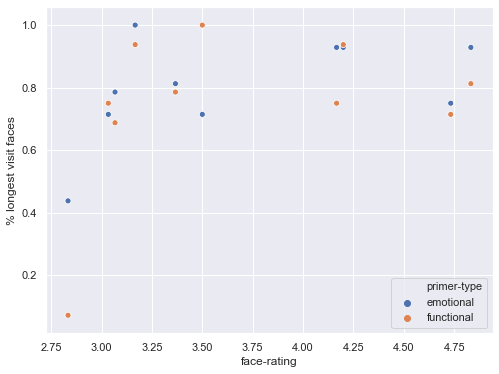

In [27]:

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='face-rating', y='% longest visit faces', hue='primer-type', data=longest_visit_final) 
plt.show()

In [28]:
first_fix_chi2_matrix = longest_visit_final.pivot(
        index='image', columns='primer-type', values='num_faces_longest_visit').transpose().as_matrix()
first_fix_chi2_matrix

/Users/sallyisa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[ 7, 13, 12, 13, 13, 10, 13, 14, 10, 11],
       [ 1, 13, 10, 15, 12, 16, 11, 15, 12, 11]])

In [29]:
first_fix_chi2_matrix = longest_visit_final.pivot(
        index='image', columns='primer-type', values='% longest visit faces').transpose().as_matrix()
first_fix_chi2_matrix

/Users/sallyisa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[0.4375    , 0.92857143, 0.75      , 0.92857143, 0.92857143,
        0.71428571, 0.8125    , 1.        , 0.71428571, 0.78571429],
       [0.07142857, 0.8125    , 0.71428571, 0.9375    , 0.75      ,
        1.        , 0.78571429, 0.9375    , 0.75      , 0.6875    ]])

In [30]:
#first_fix_chi2_matrix[0,:] = 1
#first_fix_chi2_matrix

In [31]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(first_fix_chi2_matrix)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
0.32904983774590796


===Degrees of Freedom===
9


===P-Value===
0.9999950356698788


===Contingency Table===
[[0.26358382 0.9017341  0.7583815  0.96647399 0.86936416 0.88786127
  0.82774566 1.00346821 0.7583815  0.76300578]
 [0.24534476 0.83933732 0.70590421 0.89959744 0.80920727 0.82642444
  0.77046862 0.93403179 0.70590421 0.71020851]]


Text(0.5, 1.0, '% Longest Visit on Face AOI by Image\nfor emotional vs. functional primer')

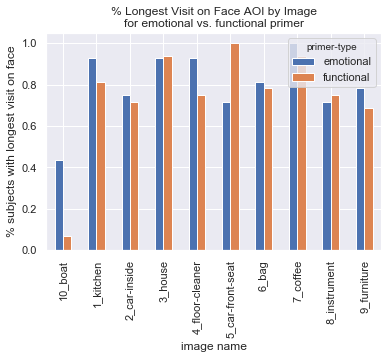

In [32]:

ax = longest_visit_final.pivot(
        index='image', columns='primer-type', values='% longest visit faces').plot.bar()
ax.set_ylabel("% subjects with longest visit on face")
ax.set_xlabel("image name")
plt.title("% Longest Visit on Face AOI by Image\nfor emotional vs. functional primer")

In [33]:
# compare means of time to first fixation for each aoi- given a primer

for img in firsts:
    #print(np.where(agg_measure_both_primers.loc[img,'face']['emotional-val'] < agg_measure_both_primers.loc[img,'face']['functional-val'], True, False))
    proves_hypothesis = np.where(agg_measure_both_primers.loc[img,'face']['emotional-val'] < agg_measure_both_primers.loc[img,'face']['functional-val'], 'true', 'false')
    agg_measure_both_primers.loc[(img,'face'),'proves-hypothesis'] = proves_hypothesis
    if (img, 'Rectangle 2') in agg_measure_both_primers.index:
        proves_hypothesis = np.where(agg_measure_both_primers.loc[img,'Rectangle 2']['functional-val'] < agg_measure_both_primers.loc[img,'Rectangle 2']['emotional-val'], 'true', 'false')
        agg_measure_both_primers.loc[(img,'Rectangle 2'),'proves-hypothesis'] = proves_hypothesis
    if (img, 'Rectangle 3') in agg_measure_both_primers.index:
        proves_hypothesis = np.where(agg_measure_both_primers.loc[img,'Rectangle 3']['functional-val'] < agg_measure_both_primers.loc[img,'Rectangle 3']['emotional-val'], 'true', 'false' )
        agg_measure_both_primers.loc[(img,'Rectangle 3'),'proves-hypothesis'] = proves_hypothesis

agg_measure_both_primers

num-datapoints-emo  emotional-val     primer  \
primed-image     AOI                                                         
10_boat          Not on AOI                   16       0.608125  emotional   
                 Rectangle 2                  16       1.611250  emotional   
                 face                         16       1.098750  emotional   
1_kitchen        Not on AOI                   14       0.778571  emotional   
                 Rectangle 2                  14       1.227143  emotional   
                 face                         14       2.960000  emotional   
2_car-inside     Not on AOI                   16       0.236875  emotional   
                 Rectangle 2                  16       1.158125  emotional   
                 face                         16       1.843125  emotional   
3_house          Not on AOI                   14       0.445714  emotional   
                 Rectangle 2                  14       0.648571  emotional   
                 face                         14       2.567143  emotional   
4_floor-cleaner  Not on AOI                   14       0.872143  emotional   
                 Rectangle 2                  14       0.250000  emotional   
                 face                         14       2.285714  emotional   
5_car-front-seat Not on AOI                   14       0.470000  emotional   
                 Rectangle 2                  14       0.612857  emotional   
                 face                         14       2.019286  emotional   
6_bag            Not on AOI                   16       0.290625  emotional   
                 Rectangle 2                  16       0.405000  emotional   
                 face                         16       2.369375  emotional   
7_coffee         Not on AOI                   14       0.285000  emotional   
                 Rectangle 2                  14       0.036429  emotional   
                 face                         14       3.302143  emotional   
8_instrument     Not on AOI                   14       1.266429  emotional   
                 Rectangle 3                  14       0.768571  emotional   
                 face                         14       1.288571  emotional   
9_furniture      Not on AOI                   14       0.569286  emotional   
                 Rectangle 2                  14       0.555000  emotional   
                 Rectangle 3                  14       0.431429  emotional   
                 face                         14       1.807143  emotional   

                              num-datapoints-funct  functional-val  \
primed-image     AOI                                                 
10_boat          Not on AOI                     14        0.682143   
                 Rectangle 2                    14        2.099286   
                 face                           14        0.972857   
1_kitchen        Not on AOI                     16        0.575625   
                 Rectangle 2                    16        1.045000   
                 face                           16        3.265625   
2_car-inside     Not on AOI                     14        0.460714   
                 Rectangle 2                    14        0.976429   
                 face                           14        1.944286   
3_house          Not on AOI                     16        0.223125   
                 Rectangle 2                    16        0.698750   
                 face                           16        2.749375   
4_floor-cleaner  Not on AOI                     16        0.779375   
                 Rectangle 2                    16        0.556875   
                 face                           16        2.138125   
5_car-front-seat Not on AOI                     16        0.384375   
                 Rectangle 2                    16        0.718125   
                 face                           16        2.475000   
6_bag            Not on AOI                     14     